<a href="https://colab.research.google.com/github/edwardoughton/spatial_computing/blob/main/4_01_Intro_To_Shapely.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro To Shapely

In Python, one of the main ways to handle geometry objects is via the package Shapely, which has a specific spatial model for handling different types of geometric objects.

See here for more info: https://shapely.readthedocs.io/en/stable/manual.html

With Shapely we can:

* Define different spatial entities as geometry objects (e.g. points, lines, polygons etc.).
* Assess relationships between different entities (e.g. geometric objects)
using various functions (e.g., contains, intersection, touching, overlapping).
* Carry out operations between various spatial objects, such as constructive (buffer, convex hull) and set-theoretic operations (intersection, union, etc.).

**Note:** As most of what you will be learning currently is more theoretical understanding than application, please assume any coordinates are in meters.

## Geometry objects

The fundamental types of geometric objects implemented by Shapely include the following:

* **Points**: A single point in space with a pair of coordinates (e.g., `(x,y)`).
* **LineStrings**: A line is basically a set of connected points (e.g., `[(x,y), (x,y)]`).
* **Polygons**: A sequence of points which close to form a planar geometric shape (e.g., `[(x,y), (x,y), (x,y)]`).
* **Multi-dimensional geometries**: Collections of points, lines, or polygons, leading to MultiPoint, MultiLineString, or MultiPolygon structures, respectively.

Nomenclature: Points, curves, and surfaces are analogous to points, linestrings, and polygons, as termed in the exercise).


### Points

According to Shapely: *A Point has an interior set of exactly one point, a boundary set of exactly no points, and an exterior set of all other points. A Point has a topological dimension of 0*.

An easier way to think of a point is as a mere set of coordinates:

- (1, 3)
- (4.34, 9.12)
- (0.10204, -1.09279)

Shapely enables us to create these as a Shapely object, as follows (and we know it is a Shapely object because when we print it, the object has the structure `POINT (7.386 -3.289)`, as opposed to just `(7.386, -3.289)`).


POINT (7.386 -3.289)


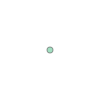

In [ ]:
# Example: Defining a shapely point geometry
from shapely.geometry import Point
my_point = Point(7.386, -3.289)
print(my_point)
my_point

### Lines

More precisely named 'linestrings', these objects contain at least two points.

Shapely states:

*The constructed LineString object represents one or more connected linear splines between the points. Repeated points in the ordered sequence are allowed, but may incur performance penalties and should be avoided. A LineString may cross itself (i.e. be complex and not simple).*

We can define a line as follows.

LINESTRING (7.386 -3.289, 7.12 -3.167)


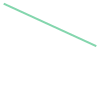

In [ ]:
# Example: Defining a shapely linestring geometry
from shapely.geometry import LineString
my_line = LineString([(7.386, -3.289),(7.12, -3.167)])
print(my_line)
my_line

### Polygons

A polygon can be thought of practically as a collection of tuple points forming a closed shape.

For example, in geometry a polygon is a plane figure that is described by a finite number of straight line segments connected to form a closed polygonal chain.

In Shapely, a Polygon function is:

*A constructor taking two positional parameters. The first is an ordered sequence of (x, y[, z]) point tuples and is treated exactly as in the LinearRing case. The second is an optional unordered sequence of ring-like sequences specifying the interior boundaries or “holes” of the feature.*

POLYGON ((7.386 -3.289, 4 -1.167, 2 -5, 7.386 -3.289))


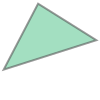

In [ ]:
# Example: Defining a shapely polygon geometry
from shapely.geometry import Polygon
my_polygon = Polygon([(7.386, -3.289),(4, -1.167),(2, -5), (7.386, -3.289)])
print(my_polygon)
my_polygon

## Task

Write out the code to specify a Shapely object for a:
* **Point** with the coordinates, 8 and 9.
* **Linestring** with three coordinates, 8 and 9, 10 and 12, and 12 and 13.
* **Polygon** with four coordinates, 8 and 9, 10 and 12, 12 and 13, and 13 and 14.


In [ ]:
# Enter your attempt here


## Generate geometry attributes

There are a set of general geometry attributes which it is important to know.

These include:

* The `.area` function to return the area of a geometry object.
* The `.bounds` function to return the minimum and maximum bounds of a geometry object.
* The `.length` function to return the length of a geometry object.
* The `.geom_type` function to return the type of a geometry object.
* The `.hausdorff_distance` function to return the furthest distance between two possible points in two separate geometry objects.
* The `.representative_point` function to return a cheaply computed representative point for a geometry object (representative point != centroid).




Here is an example of the `.area` function in use:

16.0


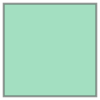

In [ ]:
# Example: Obtaining the geometry area
from shapely.geometry import Polygon
my_polygon = Polygon([(1,1),(1,5),(5,5), (5,1)])
print(my_polygon.area)
my_polygon

Here is an example of the `.bounds` function in use:

(1.0, 1.0, 5.0, 5.0)
1.0 1.0 5.0 5.0


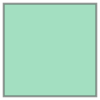

In [ ]:
# Example: Obtaining object bounds
from shapely.geometry import Polygon
my_polygon = Polygon([(1,1),(1,5),(5,5), (5,1)])
print(my_polygon.bounds)
minx, miny, maxx, maxy = my_polygon.bounds
print(minx, miny, maxx, maxy)
my_polygon

Here is an example of the `.length` function in use:

4.0


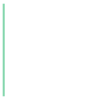

In [ ]:
# Example: Defining a shapely polygon geometry
from shapely.geometry import LineString
my_linestring = LineString([(1,1),(1,5)])
print(my_linestring.length)
my_linestring

Here is an example of the `.geom_type` function in use:

Polygon


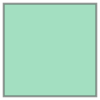

In [ ]:
# Example: Obtaining geometry type
from shapely.geometry import Polygon, LineString
my_polygon = Polygon([(1,1),(1,5),(5,5), (5,1)])
print(my_polygon.geom_type)
my_polygon

LineString


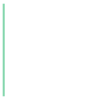

In [ ]:
# Example: Obtaining geometry type
from shapely.geometry import Polygon, LineString
my_linestring = LineString([(1,1),(1,5)])
print(my_linestring.geom_type)
my_linestring

Here is an example of the `.hausdorff_distance` function in use:

In [ ]:
# Example: Obtaining hausdorff distance
from shapely.geometry import LineString, Point
my_linestring = LineString([(1,1),(1,5)])
my_point = Point((5,5))
my_linestring.hausdorff_distance(my_point)

5.656854249492381

Here is an example of the `.representative_point` function in use:

In [ ]:
# Example: Obtaining a representative point
from shapely.geometry import Polygon, LineString
my_polygon = Polygon([(1,1),(1,5),(5,5), (5,1)])
my_polygon
print(my_polygon.representative_point())

POINT (3 3)


## Geometric operations

Now we have covered the range of `Shapely` geospatial objects able to be specified within the package, we can begin working with spatial operations.

Some of the key operations available to us to manipulate and analyze spatial objects, include:

* **Union**: Where we may add together two or more spatial objects to represent the total geographic extent of all objects.
* **Intersection**: Obtaining the common shared area between two or more spatial objects.
* **Difference**: Where the difference between two or more spatial objects is obtained, e.g., the area present in one polygon but not a second partially overlapping polygon.
* **Buffer**: Adding a buffer zone to a spatial object by converting to a polygon.
* **Distance:** Calculating the distance between spatial objects.
* **Validation:** Checking if a spatial object is actually valid (e.g., has a correctly specified geometry).


### Union

A union function will combine two different spatial objects (e.g., polygons), into a single spatial object representing the total extent.


In [ ]:
# Example: Specifying the union of two polygons
from shapely.geometry import Polygon

# First, we specify our two polygons
polygon1 = Polygon([(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)])
polygon2 = Polygon([(0, 0), (2, 2), (2, 0), (2, 0), (2, 0)])

# Then we perform the union operation
union_result = polygon1.union(polygon2)

print(polygon1)
print(polygon2)
print(union_result)

POLYGON ((1 1, 1 3, 3 3, 3 1, 1 1))
POLYGON ((0 0, 2 2, 2 0, 2 0, 2 0, 0 0))
POLYGON ((1 3, 3 3, 3 1, 2 1, 2 0, 0 0, 1 1, 1 3))


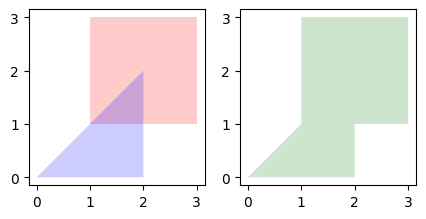

In [ ]:
# The code below plots these shapes.
# You do not need to understand this code at this stage.
import matplotlib.pyplot as plt
import geopandas as gpd
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
a = gpd.GeoSeries(polygon1)
b = gpd.GeoSeries(polygon2)
c = gpd.GeoSeries(union_result)
a.plot(color='red', alpha=.2, ax=ax1)
b.plot(color='blue', alpha=.2, ax=ax1)
c.plot(color='green', alpha=.2, ax=ax2)
plt.show()

## Task

* Specify two square Shapely polygons which overlap.
* Obtain the union of these two polygons.

In [ ]:
# Enter your attempt here


### Intersection

The intersection returns the common shared area between two or more spatial objects (e.g., Polygons).


In [ ]:
# Example: Specifying the intersection of a linestring and polygon
from shapely.geometry import LineString, Polygon

# First, we specify our linestring and polygon
line = LineString([(0, 0), (4, 4)])
polygon = Polygon([(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)])

# Then we perform the union operation
intersection_result = line.intersection(polygon)

# Our result
print("First linestring: {}".format(line))
print("Second polygon: {}".format(polygon))
print("Intersection polygon: {}".format(intersection_result))

First linestring: LINESTRING (0 0, 4 4)
Second polygon: POLYGON ((1 1, 1 3, 3 3, 3 1, 1 1))
Intersection polygon: LINESTRING (1 1, 3 3)


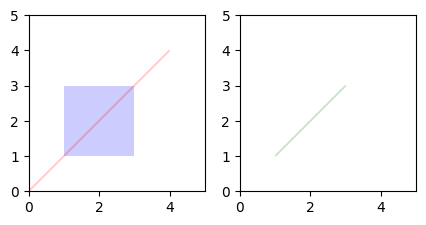

In [ ]:
# The code below plots these shapes.
# You do not need to understand this code at this stage.
import matplotlib.pyplot as plt
import geopandas as gpd
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
a = gpd.GeoSeries(line)
b = gpd.GeoSeries(polygon)
c = gpd.GeoSeries(intersection_result)
a.plot(color='red', alpha=.2, ax=ax1)
b.plot(color='blue', alpha=.2, ax=ax1)
c.plot(color='green', alpha=.2, ax=ax2)
ax1.axis((0,5,0,5))
ax2.axis((0,5,0,5))
plt.show()

### Difference

With the `difference` function, we are returned the non-overlapping area, e.g., present in one polygon but not the second.

In [ ]:
# Example: Specifying the difference of two polygons
from shapely.geometry import Polygon
from shapely.plotting import plot_polygon

# First, we specify our two polygons
polygon1 = Polygon([(4, 4), (4, 5), (5, 5), (5, 4), (4, 4)])
polygon2 = Polygon([(4, 4), (5, 5), (6, 5), (7, 4), (4, 4)])

# Then we perform the difference operation
difference_result = polygon1.difference(polygon2)

# Explore the difference between the original polygons and union object
print("First polygon: {}".format(polygon1))
print("Second polygon: {}".format(polygon2))
print("Difference polygon: {}".format(difference_result))

First polygon: POLYGON ((4 4, 4 5, 5 5, 5 4, 4 4))
Second polygon: POLYGON ((4 4, 5 5, 6 5, 7 4, 4 4))
Difference polygon: POLYGON ((4 5, 5 5, 4 4, 4 5))


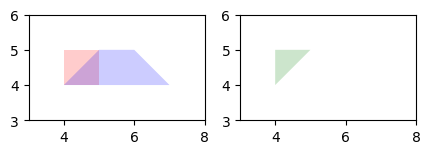

In [ ]:
# The code below plots these shapes.
# You do not need to understand this code at this stage.
import matplotlib.pyplot as plt
import geopandas as gpd
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
a = gpd.GeoSeries(polygon1)
b = gpd.GeoSeries(polygon2)
c = gpd.GeoSeries(difference_result)
a.plot(color='red', alpha=.2, ax=ax1)
b.plot(color='blue', alpha=.2, ax=ax1)
c.plot(color='green', alpha=.2, ax=ax2)
ax1.axis((3,8,3,6))
ax2.axis((3,8,3,6))
plt.show()

## Task

* Specify a triangle Shapely polygon object.
* Specify a line which runs through the triangle.
* Obtain the intersection of these two spatial objects.
* Obtain the difference of these two spatial objects.

In [ ]:
# Enter your attempt here


### Buffer

The `buffer` function allows us to add a border of a user-defined width to any object. For example, passing a linestring, would return a polygon based on the defined buffer width.

In [ ]:
# Example: Buffering a spatial object
from shapely.geometry import LineString

# Create our line
line = LineString([(1,2), (3,4)])

# Add the buffer (e.g. 5 meters)
buffered_line = line.buffer(.2)

# Print the results
print("Our original line: {}".format(line))
print("Our buffered line: {}".format(buffered_line))

Our original line: LINESTRING (1 2, 3 4)
Our buffered line: POLYGON ((2.8585786437626903 4.141421356237309, 2.873121343167271 4.154602090672547, 2.8888859533960796 4.166293922460509, 2.9057206526348005 4.176384252869671, 2.923463313526982 4.184775906502257, 2.9419430645491076 4.191388067146442, 2.9609819355967746 4.196157056080646, 2.980396571934088 4.19903694533444, 3 4.2, 3.019603428065912 4.19903694533444, 3.039018064403226 4.196157056080646, 3.0580569354508924 4.191388067146442, 3.076536686473018 4.184775906502257, 3.0942793473651995 4.176384252869671, 3.1111140466039204 4.166293922460509, 3.126878656832729 4.154602090672547, 3.1414213562373097 4.141421356237309, 3.1546020906725474 4.126878656832729, 3.166293922460509 4.11111404660392, 3.176384252869671 4.0942793473652, 3.1847759065022574 4.076536686473018, 3.1913880671464416 4.058056935450892, 3.1961570560806463 4.039018064403225, 3.1990369453344396 4.0196034280659125, 3.2 4, 3.1990369453344396 3.980396571934088, 3.196157056080646

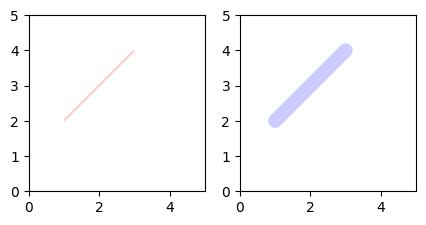

In [ ]:
# The code below plots these shapes.
# You do not need to understand this code at this stage.
import matplotlib.pyplot as plt
import geopandas as gpd
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
a = gpd.GeoSeries(line)
b = gpd.GeoSeries(buffered_line)
a.plot(color='red', alpha=.2, ax=ax1)
b.plot(color='blue', alpha=.2, ax=ax2)
ax1.axis((0,5,0,5))
ax2.axis((0,5,0,5))
plt.show()

## Task

* Specify a Shapely point with coordinates 9 and 9. Add a 2 meter buffer.
* Specify a Shapely line with the coordinates 9 and 9, and 2 and 2. Add a 4 meter buffer.

In [ ]:
# Enter your attempt here


### Distance

A very commonly used function is measuring the distance between two point.


In [ ]:
# Example: Measuring distance between spatial objects
from shapely.geometry import Point

# Define our two points
point1 = Point(0, 0)
point2 = Point(3, 4)

# Estimate the (Euclidean) distance between points
distance = point1.distance(point2)

# Explore output
print("Point 1: {}".format(point1))
print("Point 2: {}".format(point2))
print("Distance between points is: {}".format(distance))


Point 1: POINT (0 0)
Point 2: POINT (3 4)
Distance between points is: 5.0


## Task

* Calculate the distance between the coordinates 2 and 2, and 9 and 9.
* For the triangle you created in a previous task, calculate the distance between each point.

In [ ]:
# Enter your attempt here


### Validation

Often we may need to check if a geometry has been correctly defined.

In [ ]:
# Example: Checking if a geometry is valid
from shapely.geometry import Polygon

valid_polygon = Polygon([(5, 4), (5, 5), (6, 5), (7, 4), (5, 4)])

is_valid = valid_polygon.is_valid
print("Is this geometry valid? {}".format(is_valid))


Is this geometry valid? True


## Collections

A geometry collection is a single aggregated structure which contains lots of geometry objects (e.g., some combination of points, lines, polygons etc.).

Use cases for collections can be when:

* You have very complex spatial data with multiple geomtry types.
* You want to aggregate lots of data into a single easy-to-use structure.

Just be aware that highly nested data structures will become less computationally efficient to process. Moreover, because you may be mixing geometries you lose a certain degree of flexibility, requiring you to break out specific geometry types for processing, e.g., area vs length when using mixed polygons and linestrings etc.  

In [ ]:
# Example: Heterogenous geometry collection
from shapely.geometry import Point, LineString, Polygon, GeometryCollection

# Define geometry objects
my_point = Point(1, 5)
my_line = LineString([(1, 1), (1, 5), (5, 5)])
my_polygon = Polygon([(1, 1), (1, 5), (5, 5), (1, 5)])

# Create a GeometryCollection
geom_collection = GeometryCollection([my_point, my_line, my_polygon])

# Accessing the data: Print whole collection
print(geom_collection)

# Accessing the data: Print collection items individually
print(geom_collection.geoms[0])
print(geom_collection.geoms[1])
print(geom_collection.geoms[2])

# Accessing the data: Loop over geometry items
for geom in geom_collection.geoms:
  print(geom)

# Accessing the data: List comprehension
print([geom for geom in geom_collection.geoms])

GEOMETRYCOLLECTION (POINT (1 5), LINESTRING (1 1, 1 5, 5 5), POLYGON ((1 1, 1 5, 5 5, 1 5, 1 1)))
POINT (1 5)
LINESTRING (1 1, 1 5, 5 5)
POLYGON ((1 1, 1 5, 5 5, 1 5, 1 1))
POINT (1 5)
LINESTRING (1 1, 1 5, 5 5)
POLYGON ((1 1, 1 5, 5 5, 1 5, 1 1))
[<POINT (1 5)>, <LINESTRING (1 1, 1 5, 5 5)>, <POLYGON ((1 1, 1 5, 5 5, 1 5, 1 1))>]


It is possible to store single geometry object types in a single referencable structure, for example, such as a `MultiPoint`, `MultiLineString`, `Multipolygon`, etc.

Examples are shown as follows:

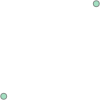

In [ ]:
# Example: MultiPoint
from shapely import MultiPoint
points = MultiPoint([(0.0, 0.0), (1.0, 1.0)])
points

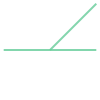

In [ ]:
# Example: MultiLineString
from shapely import MultiLineString
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
lines = MultiLineString(coords)
lines

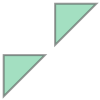

In [ ]:
# Example: MultiPolygon
from shapely import MultiPolygon
my_polygon1 = Polygon([(1, 1), (1, 5), (5, 5), (1, 1)])
my_polygon2 = Polygon([(6, 6), (6,10), (10, 10), (6, 6)])
polygons = MultiPolygon([my_polygon1, my_polygon2])
polygons

In [ ]:
# Example: MultiPolygon
print(polygons.bounds)
print(polygons.area)
print(polygons.geoms)

(1.0, 1.0, 10.0, 10.0)
16.0
